<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/bc_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

In [0]:
df=pd.read_csv("data.csv")

In [0]:
X=df.iloc[:,2:-1].values
y=df.iloc[:,1]

In [77]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [78]:
y=df["diagnosis"].map({'M':0,"B":1})
y=y.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:

# X_columns=df.columns.drop(['diagnosis','id',"Unnamed: 32"])

In [0]:
# from scipy.stats import zcore

# for x in X_columns:
#   df[x]=zscore(df[x])
# X=df[X_columns].values  

In [79]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


In [0]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [82]:

##Building ze model
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [104]:
import tensorflow.keras
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


model=Sequential()
model.add(Dense(100,input_dim=X_train.shape[1],activation="relu",kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50,activation="relu",kernel_initializer="random_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(25,activation="relu",kernel_initializer="random_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation="linear",kernel_initializer="random_normal"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

monitor=EarlyStopping(monitor="val_loss",min_delta=1e-3,patience=5,verbose=1,mode='auto', restore_best_weights=True)
##checkpointer=ModelCheckpoint(filepath="best_weights.hdf5",verbose=0,save_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
          callbacks=[monitor],verbose=2,epochs=50)

Epoch 1/50
15/15 - 0s - loss: 3.6234 - accuracy: 0.5055 - val_loss: 1.9490 - val_accuracy: 0.4123
Epoch 2/50
15/15 - 0s - loss: 1.6476 - accuracy: 0.6681 - val_loss: 1.5184 - val_accuracy: 0.4123
Epoch 3/50
15/15 - 0s - loss: 1.1330 - accuracy: 0.7538 - val_loss: 1.2648 - val_accuracy: 0.4123
Epoch 4/50
15/15 - 0s - loss: 0.8574 - accuracy: 0.8198 - val_loss: 1.0653 - val_accuracy: 0.4123
Epoch 5/50
15/15 - 0s - loss: 0.6029 - accuracy: 0.8505 - val_loss: 0.9035 - val_accuracy: 0.4123
Epoch 6/50
15/15 - 0s - loss: 0.4252 - accuracy: 0.8857 - val_loss: 0.7654 - val_accuracy: 0.4123
Epoch 7/50
15/15 - 0s - loss: 0.3067 - accuracy: 0.9011 - val_loss: 0.6534 - val_accuracy: 0.4123
Epoch 8/50
15/15 - 0s - loss: 0.2781 - accuracy: 0.9297 - val_loss: 0.5492 - val_accuracy: 0.4123
Epoch 9/50
15/15 - 0s - loss: 0.2771 - accuracy: 0.9231 - val_loss: 0.4647 - val_accuracy: 0.7807
Epoch 10/50
15/15 - 0s - loss: 0.2739 - accuracy: 0.9297 - val_loss: 0.3971 - val_accuracy: 0.9298
Epoch 11/50
15/15 -

In [0]:

def plot_lc(history,epochs):
  ##Accuracy
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model_accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.show()


   ##Loss
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model_loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")

  plt.legend(["Train","Val"],loc="upper left")
  plt.show()

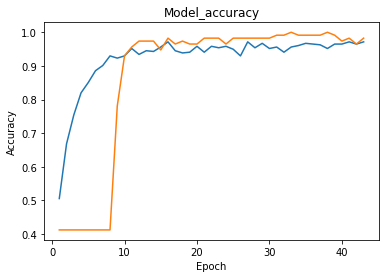

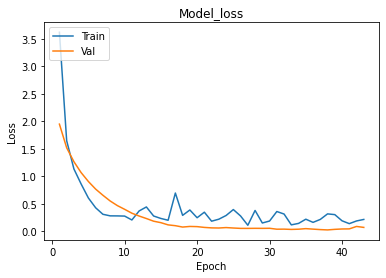

In [106]:
plot_lc(history,43)